In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

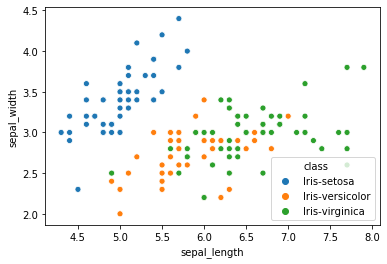

In [2]:
df = pd.read_csv(r"Data\Iris.csv", index_col= 0)
df.head(2)
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'class', data = df)

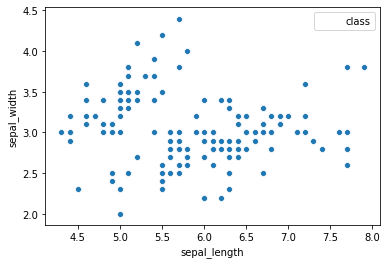

In [47]:
class_map = {'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':1}
df['class'] = df['class'].map(class_map)
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'class', data = df)

In [46]:
X = df.drop(columns = ['class']).values
y = df['class']
X = np.c_[np.ones(X.shape[0]), X]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

* SVM Steps:
    * Initialize weights, bias

    * Compute Loss

        * $ L = \frac{1}{2}||w|^2 + C[\frac{1}{n} \sum max(0, 1 - y*(w.x + b))] $

        * 1st term : maximising the margin (minimize w)
        * 2nd term : minimize misclassifications. counts the number of misclassifications, tuned by param "C"
        
    * Compute gradients : $\frac{\partial L}{\partial w}$: 
        * $ grad = \frac{1}{n} \sum w $ if $max(0, 1 - y*(w.x)) = 0 $
        * $ grad = \frac{1}{n} \sum (w - Cyx) $ otherwise
        
    * Update weights

In [40]:
X = df.drop(columns = ['class']).values
y = df['class'].values
X = np.c_[np.ones(X.shape[0]), X]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

w = np.zeros(X_train.shape[1])
n = X_train.shape[0]

regularization_strength = 1000
learning_rate = 0.05

for epoch in range(50):
    for ind, x in enumerate(X_train):
        # print(f"x : {x}")
        distances = 1 - y_train * (np.dot(X_train, w))
        distances[distances < 0] = 0
        hinge_loss = regularization_strength*np.sum(distances)/n

        loss = 1/2*np.dot(w, w) + hinge_loss
     
        distance = [1 - (y_train[ind] * (np.dot(x, w)))]
        dw = np.zeros(len(w)) # gradients

        for i, d in enumerate(distance):
            if max(0, d) == 0:
                di = w
            else:
                di = w - regularization_strength*y_train[ind]* x
            dw += di
        dw = dw
        # print(dw)
        w = w - learning_rate*dw
    print(f"loss at {epoch} epoch : {np.round(loss)}") 

loss at 0 epoch : 334.0
loss at 1 epoch : 370.0
loss at 2 epoch : 4221.0
loss at 3 epoch : 333.0
loss at 4 epoch : 335.0
loss at 5 epoch : 379.0
loss at 6 epoch : 3370.0
loss at 7 epoch : 333.0
loss at 8 epoch : 334.0
loss at 9 epoch : 380.0
loss at 10 epoch : 3370.0
loss at 11 epoch : 333.0
loss at 12 epoch : 334.0
loss at 13 epoch : 380.0
loss at 14 epoch : 3370.0
loss at 15 epoch : 333.0
loss at 16 epoch : 334.0
loss at 17 epoch : 380.0
loss at 18 epoch : 3370.0
loss at 19 epoch : 333.0
loss at 20 epoch : 334.0
loss at 21 epoch : 380.0
loss at 22 epoch : 3370.0
loss at 23 epoch : 333.0
loss at 24 epoch : 334.0
loss at 25 epoch : 380.0
loss at 26 epoch : 3370.0
loss at 27 epoch : 333.0
loss at 28 epoch : 334.0
loss at 29 epoch : 380.0
loss at 30 epoch : 3370.0
loss at 31 epoch : 333.0
loss at 32 epoch : 334.0
loss at 33 epoch : 380.0
loss at 34 epoch : 3370.0
loss at 35 epoch : 333.0
loss at 36 epoch : 334.0
loss at 37 epoch : 380.0
loss at 38 epoch : 3370.0
loss at 39 epoch : 333.0


In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print("testing the model...")
ytrain_predicted = np.array([])
for i in range(xtrain.shape[0]):
    yp = np.sign(np.dot(X_train[i], w))
    ytrain_predicted = np.append(ytrain_predicted, yp)

ytest_predicted = np.array([])
for i in range(xtest.shape[0]):
    yp = np.sign(np.dot(X_test[i], w))
    ytest_predicted = np.append(ytest_predicted, yp)

print("accuracy on test dataset: {}".format(accuracy_score(y_test, ytest_predicted)))
print("recall on test dataset: {}".format(recall_score(y_test, ytest_predicted)))
print("precision on test dataset: {}".format(precision_score(y_test, ytest_predicted)))

testing the model...
accuracy on test dataset: 0.6666666666666666
recall on test dataset: 1.0
precision on test dataset: 0.6666666666666666


In [43]:
ytest_predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [45]:
dw

array([1.31056489, 7.20841251, 3.01460487, 5.24242935, 1.70380228])

In [38]:
reg_strength = 1000
learning_rate = 0.05

X = df.drop(columns = ['class']).values
y = df['class'].values
X = np.c_[np.ones(X.shape[0]), X]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

w = np.zeros(xtrain.shape[1])
n = xtrain.shape[0]

for epoch in range(1000):
    for ind, x in enumerate(xtrain):
        # print(f"index : {ind}")
        distances = 1 - ytrain * (np.dot(xtrain, w))
        distances[distances < 0] = 0
        hinge_loss = reg_strength*np.sum(distances)/n

        loss = 1/2*np.dot(w, w) + hinge_loss
        print(loss)

        distance = [1 - (ytrain[ind] * (np.dot(x, w)))]
        dw = np.zeros(len(w)) # gradients

        for i, d in enumerate(distance):
            if max(0, d) == 0:
                di = w
            else:
                di = w - reg_strength*ytrain[ind]* x
            dw += di
        dw = dw
        w = w - learning_rate*dw

71617
8803.281732527383
7977.461763605962
7232.159241654382
6559.52371559308
5952.470153322755
5404.604313373786
4910.155392819842
4463.915242019905
4061.1835059229657
3697.7181140954767
3369.690597971168
3073.645764668979
2806.4653026137535
2565.3349356089125
2347.714779387044
2151.3125883968073
1974.0596110281183
1814.0887989528767
1669.7151410549711
1539.4179148021115
1421.8246681089056
1315.6967629682872
1219.9163285788793
1133.4744865424386
1055.4607241045508
985.053303504357
921.5106064126824
864.1633222874457
812.4073983644198
765.6976770238889
723.5421535140597
685.4967935464388
651.1608561756611
620.1726726985341
592.205837110427
566.9657679921604
544.1866056129247
523.6284115656646
505.0746414380123
488.3298638978061
473.21770216776997
459.5789762064124
447.2700260262872
436.1611984887242
426.13548163607356
417.08727217655644
408.92126313934216
401.5514399832563
394.9001745848888
388.89740756286216
383.4799103254831
378.5906190687485
374.1780337095455
370.19567542286484
366.6

In [42]:
ytrain[ind]

0

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print("testing the model...")
ytrain_predicted = np.array([])
for i in range(xtrain.shape[0]):
    yp = np.sign(np.dot(xtrain[i], w))
    ytrain_predicted = np.append(ytrain_predicted, yp)

ytest_predicted = np.array([])
for i in range(xtest.shape[0]):
    yp = np.sign(np.dot(xtest[i], w))
    ytest_predicted = np.append(ytest_predicted, yp)

print("accuracy on test dataset: {}".format(accuracy_score(ytest, ytest_predicted)))
print("recall on test dataset: {}".format(recall_score(ytest, ytest_predicted)))
print("precision on test dataset: {}".format(precision_score(ytest, ytest_predicted)))

testing the model...
accuracy on test dataset: 0.6666666666666666
recall on test dataset: 1.0
precision on test dataset: 0.6666666666666666


In [49]:
ytest_predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
# >> FEATURE SELECTION << #
def remove_correlated_features(X):
    corr_threshold = 0.9
    corr = X.corr()
    drop_columns = np.full(corr.shape[0], False, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= corr_threshold:
                drop_columns[j] = True
    columns_dropped = X.columns[drop_columns]
    X.drop(columns_dropped, axis=1, inplace=True)
    return columns_dropped


def remove_less_significant_features(X, Y):
    sl = 0.05
    regression_ols = None
    columns_dropped = np.array([])
    for itr in range(0, len(X.columns)):
        regression_ols = sm.OLS(Y, X).fit()
        max_col = regression_ols.pvalues.idxmax()
        max_val = regression_ols.pvalues.max()
        if max_val > sl:
            X.drop(max_col, axis='columns', inplace=True)
            columns_dropped = np.append(columns_dropped, [max_col])
        else:
            break
    regression_ols.summary()
    return columns_dropped



In [6]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

In [15]:
print("reading dataset...")
# set hyper-parameters and call init
regularization_strength = 10000
learning_rate = 0.000001

# read data in pandas (pd) data frame
data = pd.read_csv(r'Data/cancer.csv')

# drop last column (extra column added by pd)
# and unnecessary first column (id)
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

print("applying feature engineering...")
# convert categorical labels to numbers
diag_map = {'M': 1.0, 'B': -1.0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

# put features & outputs in different data frames
Y = data.loc[:, 'diagnosis']
X = data.iloc[:, 1:]

# filter features
remove_correlated_features(X)
remove_less_significant_features(X, Y)

# normalize data for better convergence and to prevent overflow
X_normalized = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_normalized)

# insert 1 in every row for intercept b
X.insert(loc=len(X.columns), column='intercept', value=1)

# split data into train and test set
print("splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = tts(X[:20], Y[:20], test_size=0.2, random_state=42)

reading dataset...
applying feature engineering...
splitting dataset into train and test sets...


In [20]:
w = np.zeros(X_train.shape[1])
n = X_train.shape[0]

for epoch in range(5):
    for ind, x in enumerate(X_train.to_numpy()):
        # print(f"x : {x}")
        distances = 1 - y_train * (np.dot(X_train, w))
        distances[distances < 0] = 0
        hinge_loss = regularization_strength*np.sum(distances)/n

        loss = 1/2*np.dot(w, w) + hinge_loss
     
        distance = [1 - (y_train.iat[ind] * (np.dot(x, w)))]
        dw = np.zeros(len(w)) # gradients

        for i, d in enumerate(distance):
            if max(0, d) == 0:
                di = w
            else:
                di = w - regularization_strength*y_train.iat[ind]* x
            dw += di
        dw = dw
        w = w - learning_rate*dw
    print(f"loss at {epoch} epoch : {np.round(loss)}") 
    

loss at 0 epoch : 7118.0
loss at 1 epoch : 4058.0
loss at 2 epoch : 2250.0
loss at 3 epoch : 1658.0
loss at 4 epoch : 1320.0


In [88]:
x

array([0.36557322, 0.05583411, 0.34292929, 0.14342881, 0.02929567,
       0.02888515, 0.02699495, 0.12875545, 0.02201401, 0.27161065,
       0.22255076, 0.090122  , 1.        ])

In [80]:
# (y_train.iat[ind] * 
distance

1.0

In [78]:
X_train.values[0]

array([0.25769361, 0.73336457, 0.53080808, 0.64237574, 0.07818215,
       0.62943491, 0.76717172, 0.62928585, 0.29933115, 0.50868388,
       0.52493594, 0.40968123, 1.        ])

In [77]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,intercept
68,0.257694,0.733365,0.530808,0.642376,0.078182,0.629435,0.767172,0.629286,0.299331,0.508684,0.524936,0.409681,1
181,0.570172,0.582709,0.674242,0.505897,0.187688,0.340508,0.097778,0.296837,0.152018,0.514627,0.499310,0.481175,1
63,0.140345,0.140300,0.646970,0.414280,0.108021,0.278848,0.108889,0.295511,0.170225,0.179555,0.338459,0.195855,1
248,0.524518,0.055740,0.422727,0.280750,0.050045,0.060820,0.027298,0.118299,0.059568,0.519910,0.363493,0.173357,1
60,0.174839,0.025398,0.850000,0.413648,0.146406,0.065626,0.019356,0.155200,0.174751,0.371987,0.392667,0.165027,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.166723,0.201640,0.425253,0.839090,0.150172,0.686664,0.143207,0.334533,0.726725,0.327082,0.135817,0.349993,1
106,0.291512,0.165651,0.374242,0.320977,0.070433,0.156578,0.074369,0.264823,0.101751,0.644720,0.244628,0.235668,1
270,0.240446,0.016987,0.226263,0.080034,0.006772,0.010950,0.012187,0.068346,0.016797,0.095754,0.176030,0.040404,1
435,0.335137,0.263824,0.307576,0.326032,0.039580,0.117598,0.055177,0.181228,0.067410,0.595192,0.318155,0.330972,1
